In [1]:
!pip install pyTsetlinMachineParallel
!python3 -V

Python 3.10.16


In [2]:
!export OMP_NUM_THREADS=20
from pyTsetlinMachineParallel.tm import MultiClassTsetlinMachine
from tensorflow.keras.datasets import cifar10
from time import time

In [3]:
(X_train, Y_train), (X_val, Y_val) = cifar10.load_data()

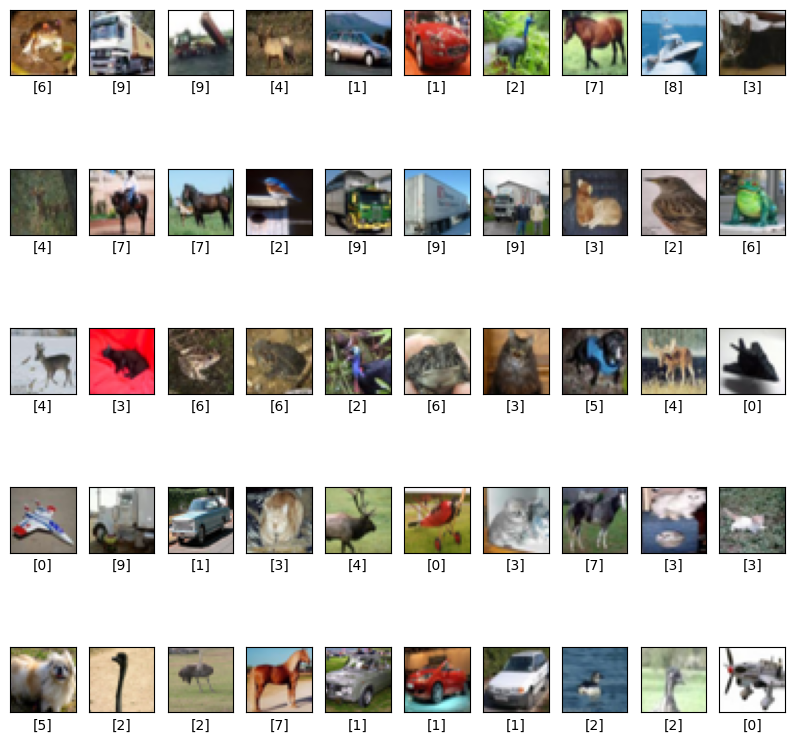

In [4]:
# Show a sample from the input dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(0,50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.hsv)
    plt.xlabel(Y_train[i])

In [5]:
# Preprocess data
import numpy as np

X_train = np.copy(X_train)
X_val = np.copy(X_val)

# normalize
X_train = X_train / 255.0
X_val = X_val / 255.0

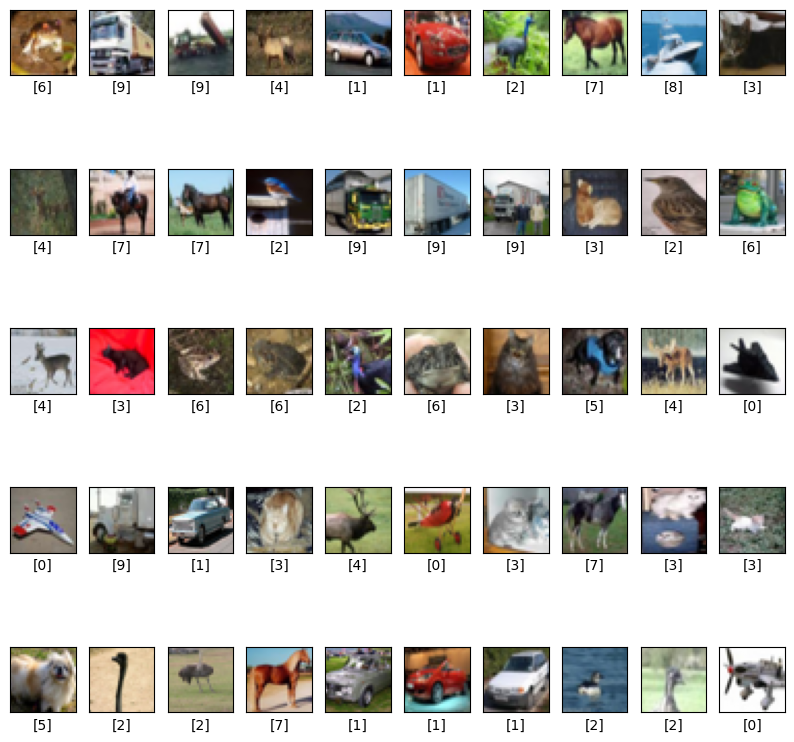

In [6]:
# view the data after preprocessing
plt.figure(figsize=(10,10))
for i in range(0,50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.hsv, vmin=0, vmax=1)
    plt.xlabel(Y_train[i])

In [7]:
# reshape the data
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

Y_train = Y_train.reshape(Y_train.shape[0])
Y_val = Y_val.reshape(Y_val.shape[0])

# Input data flattening
X_train = X_train.reshape(X_train.shape[0], 32*32, 3)
X_val = X_val.reshape(X_val.shape[0], 32*32, 3)
Y_train = Y_train.flatten()
Y_val = Y_val.flatten()

### Set params for the models

In [8]:
teacher_num_clauses = 800
epochs = 60
T = 500
s = 5

### Train the model

In [9]:
#create TM-1
tm = MultiClassTsetlinMachine(teacher_num_clauses, T, s, number_of_state_bits=8)
#train TM-1 on the original dataset
for i in range(epochs):
    start_training = time()
    tm.fit(X_train, Y_train, epochs=1, incremental=True)
    stop_training = time()

    start_testing = time()
    result = 100*(tm.predict(X_val) == Y_val).mean()
    stop_testing = time()
    print(f'Epoch {i:>3}: Training time: {stop_training-start_training:.2f} s, Testing time: {stop_testing-start_testing:.2f} s, Test accuracy: {result:.2f}%')

print("--\nAccuracy:", 100*(tm.predict(X_val) == Y_val).mean())

Epoch   0: Training time: 9.74 s, Testing time: 0.93 s, Test accuracy: 10.01%
Epoch   1: Training time: 9.79 s, Testing time: 0.89 s, Test accuracy: 10.03%
Epoch   2: Training time: 9.57 s, Testing time: 0.95 s, Test accuracy: 9.88%
Epoch   3: Training time: 9.66 s, Testing time: 0.94 s, Test accuracy: 9.98%
Epoch   4: Training time: 9.55 s, Testing time: 0.88 s, Test accuracy: 10.03%
Epoch   5: Training time: 9.51 s, Testing time: 0.87 s, Test accuracy: 9.92%
Epoch   6: Training time: 9.51 s, Testing time: 1.07 s, Test accuracy: 9.88%
Epoch   7: Training time: 9.52 s, Testing time: 0.91 s, Test accuracy: 10.13%
Epoch   8: Training time: 9.53 s, Testing time: 0.90 s, Test accuracy: 9.97%
Epoch   9: Training time: 9.49 s, Testing time: 0.94 s, Test accuracy: 9.98%
Epoch  10: Training time: 9.53 s, Testing time: 0.99 s, Test accuracy: 10.08%
Epoch  11: Training time: 9.65 s, Testing time: 0.94 s, Test accuracy: 10.28%
Epoch  12: Training time: 9.44 s, Testing time: 0.93 s, Test accuracy: